Import Library

In [1]:
import numpy as np
import cv2
import pandas as pd
import seaborn as sns
import os
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.optimizers import Adam, SGD, RMSprop
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
import scipy

Create Data Generator

In [2]:
train_dir = 'data/train'
val_dir = 'data/val'
test_dir= 'data/test/'

num_train = 28709
num_val = 3589
num_test = 3589
batch_size = 128
num_epoch = 20

data_gen = ImageDataGenerator(rescale=1./255)
train_generator= data_gen.flow_from_directory(train_dir,
                                    target_size=(48, 48),
                                    batch_size=batch_size,
                                    shuffle=True,
                                    color_mode="grayscale",
                                    class_mode='categorical')

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_dir,
        target_size=(48, 48),
        batch_size=batch_size,
        shuffle=False,
        color_mode="grayscale",
        class_mode='categorical')

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir,
        target_size=(48, 48),
        batch_size=batch_size,
        shuffle=False,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [3]:
Model_Checkpoint_Callback = ModelCheckpoint('model.h5', 
                                            monitor='val_accuracy', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='max',
                                            save_freq = "epoch")

Model Building

In [4]:
model = Sequential()

model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(256,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=num_train//batch_size,
                              epochs=num_epoch,
                              validation_data=validation_generator,
                              validation_steps=num_val//batch_size,
                              callbacks=[Model_Checkpoint_Callback])

C:\Users\Tommy\AppData\Local\Temp\ipykernel_24116\3589193558.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/20
224/224 [==============================] - ETA: 0s - loss: 1.8077 - accuracy: 0.2976
Epoch 1: val_accuracy improved from -inf to 0.24526, saving model to model.h5
224/224 [==============================] - 254s 1s/step - loss: 1.8077 - accuracy: 0.2976 - val_loss: 1.9861 - val_accuracy: 0.2453
Epoch 2/20


C:\Users\Tommy\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


224/224 [==============================] - ETA: 0s - loss: 1.3920 - accuracy: 0.4617
Epoch 2: val_accuracy improved from 0.24526 to 0.41825, saving model to model.h5
224/224 [==============================] - 251s 1s/step - loss: 1.3920 - accuracy: 0.4617 - val_loss: 1.4844 - val_accuracy: 0.4182
Epoch 3/20
224/224 [==============================] - ETA: 0s - loss: 1.2043 - accuracy: 0.5408
Epoch 3: val_accuracy improved from 0.41825 to 0.49079, saving model to model.h5
224/224 [==============================] - 253s 1s/step - loss: 1.2043 - accuracy: 0.5408 - val_loss: 1.3139 - val_accuracy: 0.4908
Epoch 4/20
224/224 [==============================] - ETA: 0s - loss: 1.0766 - accuracy: 0.5952
Epoch 4: val_accuracy improved from 0.49079 to 0.53404, saving model to model.h5
224/224 [==============================] - 252s 1s/step - loss: 1.0766 - accuracy: 0.5952 - val_loss: 1.2067 - val_accuracy: 0.5340
Epoch 5/20
224/224 [==============================] - ETA: 0s - loss: 0.9817 - accur

Load Saved Model

In [5]:
from keras.models import load_model
model_test=load_model('model.h5')
model_test.evaluate(test_generator)

29/29 [==============================] - 8s 255ms/step - loss: 2.3432 - accuracy: 0.5954


[2.3432228565216064, 0.5954304933547974]

Create Confusion Matrix

In [6]:
from keras.models import load_model

model_test = load_model("model.h5")
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model_test.predict_generator(test_generator, num_test // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_generator.classes, y_pred)
print(cm)

C:\Users\Tommy\AppData\Local\Temp\ipykernel_24116\1426235422.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model_test.predict_generator(test_generator, num_test // batch_size+1)


Confusion Matrix
[[183  12  80  41  68  78   5]
 [  7  30   7   3   3   6   0]
 [ 23   8 239  27  73 106  20]
 [ 18   3  27 710  90  36  11]
 [ 26   0  50  52 387  90   2]
 [ 42   4 105  38 145 313   6]
 [  9   1  68  26  23  13 275]]


In [7]:
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       angry       0.59      0.39      0.47       467
     disgust       0.52      0.54      0.53        56
        fear       0.41      0.48      0.45       496
       happy       0.79      0.79      0.79       895
     neutral       0.49      0.64      0.55       607
         sad       0.49      0.48      0.48       653
    surprise       0.86      0.66      0.75       415

    accuracy                           0.60      3589
   macro avg       0.59      0.57      0.57      3589
weighted avg       0.61      0.60      0.60      3589



Text(0.5, 100.22222222222219, 'Predicted label')

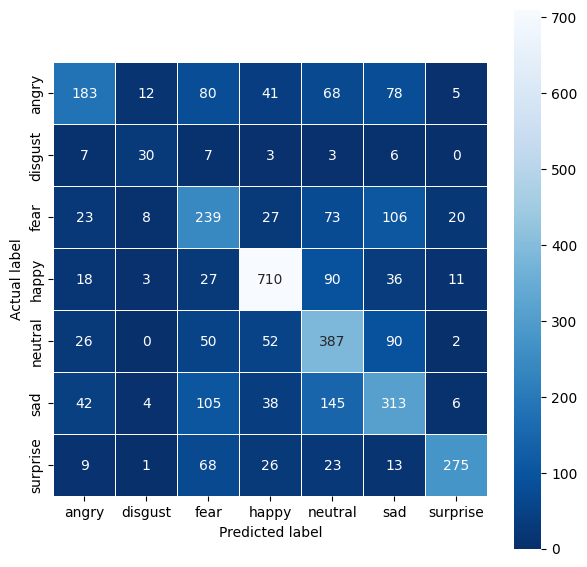

In [8]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='d',linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=target_names, xticklabels=target_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
''',rotation_range=10,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              horizontal_flip=True'''